In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Sulfur Iodine Thermochemical cycle

The following figure displays an example of a S-I Thermochemical cycle coupled to a nuclear reactor.

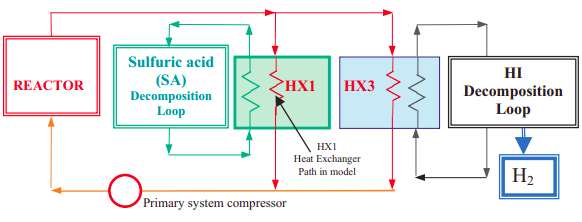

In [2]:
from IPython.display import Image
Image(filename='figures/sulfur3.png')

* decomposition of sulfuric acid: T >= 700C
The sulfuric acid vapors are decomposed in two steps:

H$_2$SO$_4$ $\rightarrow$ SO$_3$ + H$_2$O (T > 450C)

SO$_3$ $\rightarrow$ SO$_2$ + $\frac{1}{2}$O$_2$ (T > 800C)

(The introduction says T>700, and now it says 800C...)

At 1 bar, the production of sulfur dioxide decreases at T<800C. 50% at 700C, and no sulfur dioxide at 650C.

* Bunsen reaction: (exothermic reaction) T~120C

I$_2$ + SO$_2$ + 2H$_2$O $\rightarrow$ H$_2$SO$_4$ + 2HI

* decomposition of hydrogen iodide: T >= 300C

2HI $\rightarrow$ I$_2$ + H$_2$

Hydrogen is produced at P = 4MPa.

Production rate = 75 L/min.

Production rate for a 50MWth (estimate): 12000 kg/day.

https://art.inl.gov/NGNP/Subcontractors%20Documents/General%20Atomics/Sulfur%20Iodine%20Process%20Summary%20for%20the%20Hydrogen%20Technology%20Down-Selection.pdf

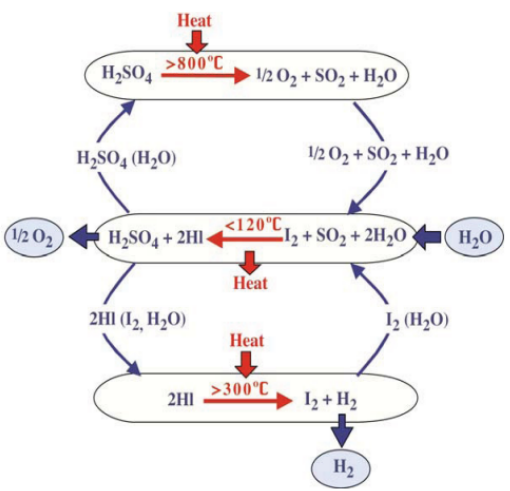

In [3]:
from IPython.display import Image
Image(filename='figures/sulfur1.png')

HYSYS simulator by Aspen Technologies. The most efficient temperature for sulfuric acid decomposition is 650$^\circ$C, with a thermal efficiency of 75.11%. The simulation does not consider heat loss in the process. Bilgen's flowsheet gives a thermal efficiency of  77%.

Sulfuric acid decomposition:
2H$_2$SO$_4$ = 2H$_2$O + 2SO$_2$, $\Delta$H = 186 kJ/mol, T=600-900C

Hydriodic acid decomposition reaction:
2HI = H$_2$ + I$_2$, $\Delta$H = 12 kJ/mol

https://core.ac.uk/download/pdf/37987793.pdf 

The values from this source seem to be inconsistent with other documents.

Sulfuric acid decomposition:
* Optimun temperature at 925C
* reaction enthalpy: 278.643kJ/mol

http://ethesis.nitrkl.ac.in/5368/1/109CH0524.pdf

This is not consistent with the previous numbers. Let's look for other sources.

278.64 kJ/mol to produce the SO$_2$, and the total thermal energy supplied was determined to be 366.747 kJ/mol SO2.

Okay, these numbers match the latter source.

https://www.sciencedirect.com/science/article/pii/019689049400036Y

**Note to myself:** I should get the mole fraction for all the molecules, relative to one H$_2$ mole.




https://web.mit.edu/yildizgroup/LEI/assets/pdfs/bilge_ijhe_2006.pdf

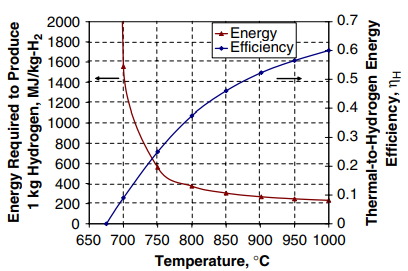

In [4]:
from IPython.display import Image
Image(filename='figures/si-energy.png')

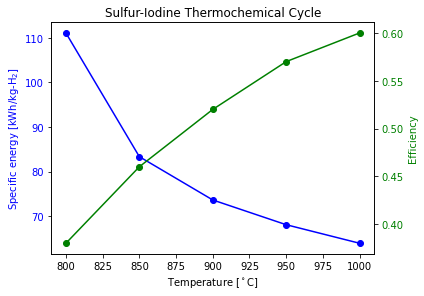

In [11]:
# I will get the data from the previous plot
# temp = [750, 800, 850, 900, 950, 1000]
# sel = [600, 400, 300, 265, 245, 230]  # specfic energy [MJ/kg-H2}
# se = 1e3/3600 * np.array(sel)  # [kWh/kg-H2]
# ef = [0.25, 0.38, 0.46, 0.52, 0.57, 0.6]

temp = [800, 850, 900, 950, 1000]
sel = [400, 300, 265, 245, 230]  # specfic energy [MJ/kg-H2}
se = 1e3/3600 * np.array(sel)  # [kWh/kg-H2]
ef = [0.38, 0.46, 0.52, 0.57, 0.6]

fig, ax1 = plt.subplots()
ax1.plot(temp, se, color='blue', marker="o")
ax1.set_xlabel("Temperature [$^\circ$C]")
ax1.set_ylabel("Specific energy [kWh/kg-H$_2$]", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax2 = ax1.twinx()
ax2.plot(temp, ef, color='green', marker="o")
ax2.set_ylabel('Efficiency', color='green')
ax2.tick_params(axis='y', labelcolor='green')
fig.tight_layout()
plt.title('Sulfur-Iodine Thermochemical Cycle')
plt.savefig("figures/si-energy2", dpi=300, bbox_inches="tight")
#plt.show()

The data from https://web.mit.edu/yildizgroup/LEI/assets/pdfs/bilge_ijhe_2006.pdf comes originally from https://www.osti.gov/servlets/purl/814014.

T = 827C, $\eta$ = 0.50, P = 2400 MW$_{th}$, 4200 moles/s

Those numbers are consistent with Table 4-1 of the https://www.osti.gov/servlets/purl/814014.

|P[MW$_{th}$]|$\eta_{H,SI}$| prodcution rate [kg/day]|
|------------|-------------|-------------------------|
|50           | 40%        | 12000                   |
|600          | 42%        | 150000                  |
|2400         | 52%        | 760000                  |

Text(0.5, 0, 'Temperature [$^\\circ$C]')

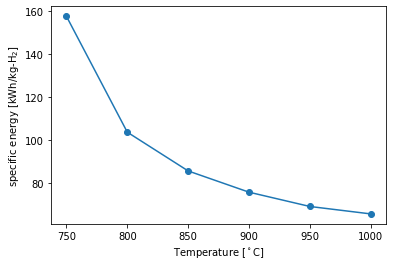

In [3]:
pr = 4200  # moles/sec
Mh = 1.008
sev = 2400e3/(pr*(2*Mh/1e3)*3600*np.array(ef)/0.5)

plt.plot(temp, sev, marker="o")
plt.ylabel("specific energy [kWh/kg-H$_2$]")
plt.xlabel("Temperature [$^\circ$C]")

The values in the last two plots are consistent. Those values compose the function 'si_prod_rate'.

In [4]:
HHV = 285  # kJ/mol
ef = 0.42
E = HHV/ef
print("1 mol of H2 takes:", E, "kJ at T=827C (outlet reactor T=850C)")
E = E/(2*1.008*1e-3)/3600  # kWh/kg-H2

P = 600  # MW
pr = P*1e3/E  # kg/h
pr *= 24  # kg/day  
print("The production rate for 600MW and 42% ef is", pr, "kg/day")

1 mol of H2 takes: 678.5714285714286 kJ at T=827C (outlet reactor T=850C)
The production rate for 600MW and 42% ef is 154013.91157894736 kg/day


### Different reactor sizes

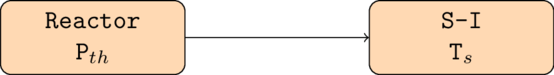

In [6]:
from wand.image import Image as WImage
img = WImage(filename='./figures/si-figure0.png')
w, h = img.size
b = 75
a = int(w/h*b)
img.resize(a, b)
img

This will be helpful in the next section.

P$_{th}$ = $\dot{m}_p$c$_p$(T$_o$-T$_i$) = $\dot{m}_s$c$_p$(T$_r$-T$_{in}$) = $\dot{m}_s$ (h(T$_r$)-h(T$_{in}$)) = $\Delta$ H$_{SI}$ (T$_r$)

$T_o$: outlet reactor temperature

$T_i$: outlet reactor temperature

$T_r$: outlet heat exchanger temperature

$T_{in}$: inlet heat exchanger temperature

$\dot{m}_p$: primary loop mass flow

$\dot{m}_s$: secondary loop mass flow



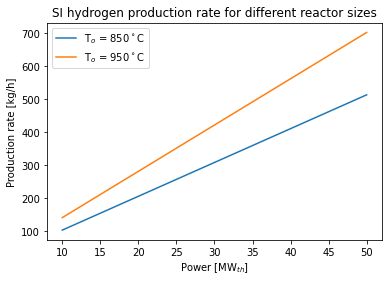

In [1]:
import numpy as np
import hydrogen as h2
import matplotlib.pyplot as plt

To1 = 850  # Reactor outlet temperature
To2 = 950  # Reactor outlet temperature
power = [10, 20, 30, 40, 50]  # MW_{th)
prate1 = [h2.si_prod_rate(P, To1)[0] for P in power]  # kg-H2/h
prate2 = [h2.si_prod_rate(P, To2)[0] for P in power]  # kg-H2/h

plt.plot(power, prate1, label='T$_o$ = {0}$^\circ$C'.format(To1))
plt.plot(power, prate2, label='T$_o$ = {0}$^\circ$C'.format(To2))

plt.legend(loc="upper left")
plt.title('SI hydrogen production rate for different reactor sizes')
plt.ylabel('Production rate [kg/h]')
plt.xlabel('Power [MW$_{th}$]')
plt.savefig("figures/si-size", dpi=300, bbox_inches="tight")
plt.show()

## SI2: SI with steam temperature boosting system

Case where the reactor outlet temperature is not high enough as to make use of the SI thermochemical cycle. The steam receives a heat boosting by means of an electrical boiler.

* T$_s$: temperature at which the SI cycle operates
* T$_r$: 97% of the outlet reactor temperature

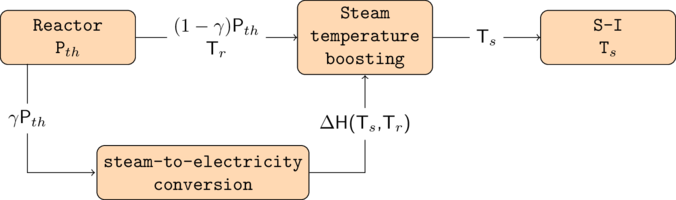

In [38]:
from wand.image import Image as WImage
img = WImage(filename='./figures/si-figure1.png')
w, h = img.size
b = 200
a = int(w/h*b)
img.resize(a, b)
img

Now with the temperature boosting system, the heat is:
(1-$\gamma$)P$_{th}$ = $\dot{m}_p$c$_p$(T$_o$-T$_i$) = $\dot{m}_s$c$_p$(T$_r$-T$_{in}$) = $\dot{m}_s$ (h(T$_r$)-h(T$_{in}$))

And $\Delta$ H$_{SI}$ (T$_s$) = $\dot{m}_s$ (h(T$_r$)-h(T$_{in}$)+h$_{boost}$)

$\dot{m}_s$ & $T_{in}$ are arbitrary. I choose $T_{in} \geq T_{sat}$ so it stays as a gas.

$\dot{m}_s \geq \frac{\Delta h_{SI}(T_s)}{h(T_s)-h(T_{sat})}$

I need to determine the pressure of the secondary loop in order to know T$_{sat}$.

Then, $ H_{boost} = \dot{m}_s (h(T_s)-h(T_r)) $.

I assume P=3.5MPa, for the enthalpy it won't change that much. A more accurate value for the pressure would be better, of course.


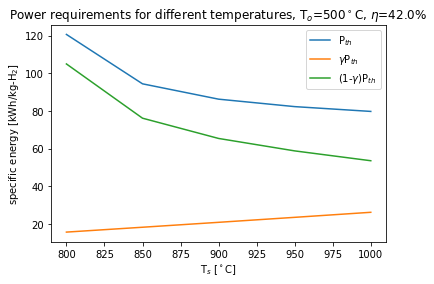

In [4]:
import numpy as np
import hydrogen as h2
import matplotlib.pyplot as plt

To = 500
eta = h2.efficiency(To)
temp = [800, 850, 900, 950, 1000]
Pth = [h2.si2_power_req(eta, To, Ts)[0] for Ts in temp]
gamma = [h2.si2_power_req(eta, To, Ts)[1] for Ts in temp]

plt.plot(temp, Pth, label='P$_{th}$')
plt.plot(temp, np.array(gamma)*np.array(Pth), label="$\gamma$P$_{th}$")
plt.plot(temp, (1-np.array(gamma))*np.array(Pth), label="(1-$\gamma$)P$_{th}$")
plt.legend(loc="upper right")
plt.title('Power requirements for different temperatures, T$_o$={0}$^\circ$C, $\eta$={1}%'.format(To, 100*round(eta, 2)))
plt.ylabel("specific energy [kWh/kg-H$_2$]")
plt.xlabel("T$_s$ [$^\circ$C]")
plt.savefig("figures/si2-overT", dpi=300, bbox_inches="tight")
plt.show()

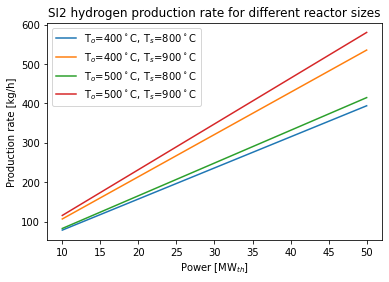

In [2]:
import numpy as np
import hydrogen as h2
import matplotlib.pyplot as plt

To1 = 400
To2 = 500
Ts1 = 800
Ts2 = 900
power = [10, 20, 30, 40, 50]  # MW_{th)

prate1 = [h2.si2_prod_rate(p, To1, Ts1)[0] for p in power]  # kg-H2/h
prate2 = [h2.si2_prod_rate(p, To1, Ts2)[0] for p in power]  # kg-H2/h
prate3 = [h2.si2_prod_rate(p, To2, Ts1)[0] for p in power]  # kg-H2/h
prate4 = [h2.si2_prod_rate(p, To2, Ts2)[0] for p in power]  # kg-H2/h

plt.plot(power, prate1, label='T$_o$={0}$^\circ$C, T$_s$={1}$^\circ$C'.format(To1, Ts1))
plt.plot(power, prate2, label='T$_o$={0}$^\circ$C, T$_s$={1}$^\circ$C'.format(To1, Ts2))
plt.plot(power, prate3, label='T$_o$={0}$^\circ$C, T$_s$={1}$^\circ$C'.format(To2, Ts1))
plt.plot(power, prate4, label='T$_o$={0}$^\circ$C, T$_s$={1}$^\circ$C'.format(To2, Ts2))

plt.legend(loc="upper left")
plt.title('SI2 hydrogen production rate for different reactor sizes')
plt.ylabel('Production rate [kg/h]')
plt.xlabel('Power [MW$_{th}$]')
plt.savefig("figures/si2-size", dpi=300, bbox_inches="tight")
plt.show()

### Others sources:
* http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.511.9997&rep=rep1&type=pdf
* https://www.hydrogen.energy.gov/pdfs/progress08/ii_h_1_pickard.pdf  
* https://www.scirp.org/journal/paperinformation.aspx?paperid=90227
* https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=6076030